In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
wines=pd.read_csv(r'Wine.csv')
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


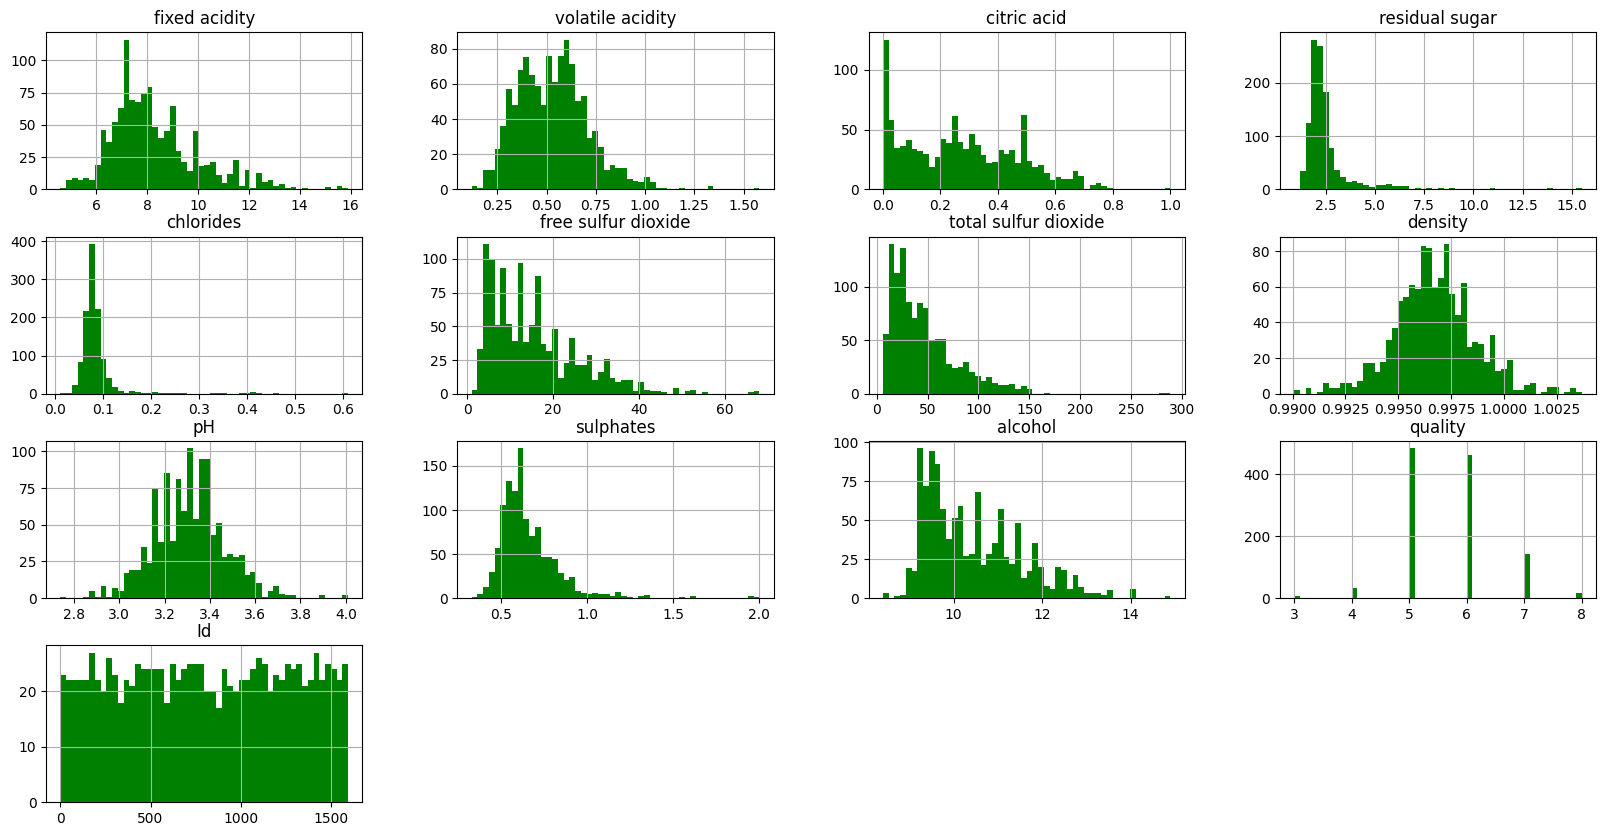

In [4]:
wines.hist(bins=50, color="green", figsize=(20,10))
plt.show()

In [5]:
X=wines.drop(columns=['quality'], axis=1)
y=wines['quality']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import ElasticNet
lr=ElasticNet(alpha=0.1,l1_ratio=0.5, random_state=42)
lr.fit(X_train, y_train)

ElasticNet(alpha=0.1, random_state=42)

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [9]:
def eval_metrics(actual, pred):
    rmse=np.sqrt(mean_squared_error(actual, pred))
    mse=mean_squared_error(actual, pred)
    r2=r2_score(actual, pred)
    return rmse, mse, r2

In [11]:
predicted_value=lr.predict(X_test)

In [13]:
predicted_value

array([5.41827018, 5.11124249, 5.47220991, 5.27146275, 6.35194597,
       6.49994323, 5.41305884, 5.19195673, 5.70485351, 5.3980524 ,
       6.27045638, 5.92748989, 5.74737186, 6.14964586, 5.85425439,
       5.56051331, 5.5014995 , 5.67549416, 5.42078388, 6.20175259,
       5.74908949, 5.88520389, 5.21947575, 6.15249646, 5.6468529 ,
       5.41428448, 6.3145176 , 5.86278447, 5.35666361, 5.57796355,
       6.39874219, 5.54267933, 6.4496524 , 5.67001657, 5.75237299,
       5.26007007, 5.67783963, 5.80701407, 6.5990968 , 5.14814451,
       5.98899061, 5.67122952, 6.68134479, 5.48775059, 5.42112696,
       5.37167409, 5.91657362, 5.90908389, 5.1220525 , 5.88900446,
       6.21305379, 5.61952411, 5.61123571, 5.699142  , 5.51902632,
       6.23358344, 5.74317845, 5.75628747, 5.51127107, 5.42736815,
       5.51287797, 5.98921461, 5.72192076, 5.9337469 , 6.02348539,
       5.59003484, 6.52929783, 5.21137133, 5.18590923, 5.97240397,
       5.34815543, 5.36882586, 5.31793627, 6.19542595, 5.55907

In [14]:
(rmse, mse, r2)= eval_metrics(y_test, predicted_value)

In [18]:
print("rmse = ", rmse)
print("mse= ", mse)
print("r2= ", r2)

rmse =  0.629995959330732
mse=  0.39689490877304945
r2=  0.2867669826959264
